# 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# 2. Loading the Dataset

In [3]:
df = pd.read_csv('Bank Churn Modelling (2).csv')


# 3. Initial Data Exploration

In [4]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [7]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [8]:
df.isnull().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

# 4. Handling Duplicates and Indexing

In [9]:
df.duplicated('CustomerId').sum()

0

In [10]:
df = df.set_index('CustomerId')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [11]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df.replace({'Geography': {'France':2,'Germany':1,'Spain':0}}, inplace=True)
df['Gender'].value_counts()

C:\Users\91738\AppData\Local\Temp\ipykernel_20292\2318109329.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Geography': {'France':2,'Germany':1,'Spain':0}}, inplace=True)


Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [13]:
df.replace({'Gender':{'Female':1,'Male':0}}, inplace=True)

C:\Users\91738\AppData\Local\Temp\ipykernel_20292\3497801055.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'Female':1,'Male':0}}, inplace=True)


# 6. Feature Engineering

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  int64  
 3   Gender            10000 non-null  int64  
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 1015.6+ KB


In [15]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [16]:
df.replace({'Num of Products': {1: 0, 2: 1, 3: 1, 4: 1}}, inplace=True)
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [17]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [18]:
df.loc[(df['Balance'] == 0), 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [19]:
df['Zero Balance'] = np.where(df['Balance'] > 0, 1, 0)
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# 7. Data Visualization

Text(0, 0.5, 'count')

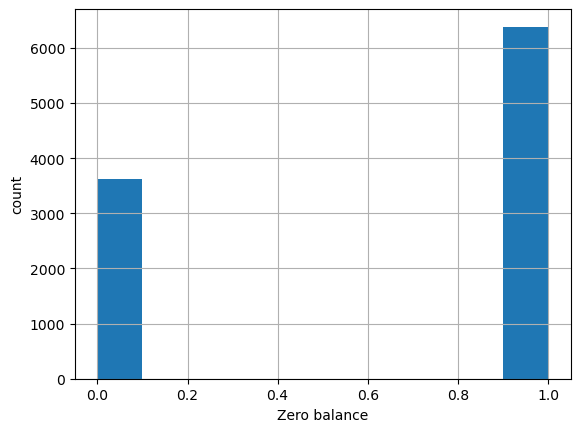

In [20]:
df['Zero Balance'].hist()
plt.xlabel("Zero balance")
plt.ylabel('count')

<Axes: xlabel='Churn', ylabel='count'>

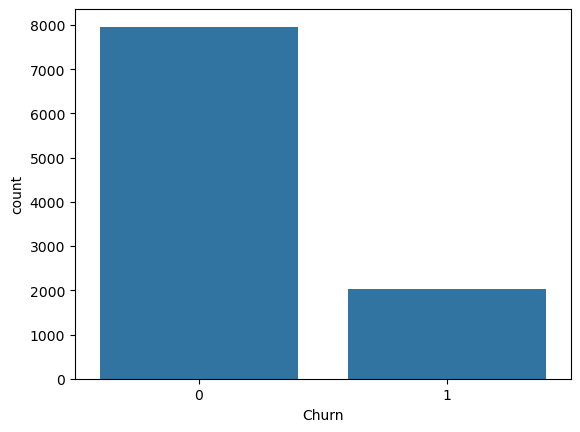

In [21]:
sns.countplot(x="Churn", data=df)

# 8. Preparing Data for Modeling

In [22]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [23]:
X = df.drop(['Surname', 'Churn'], axis=1)
y = df['Churn']
X.shape, y.shape

((10000, 11), (10000,))

# 9. Handling Imbalanced Data

*   **Random Under sampler**





In [24]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=2529)
X_rus, y_rus = rus.fit_resample(X, y)
X_rus.shape, y_rus.shape, X.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [25]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

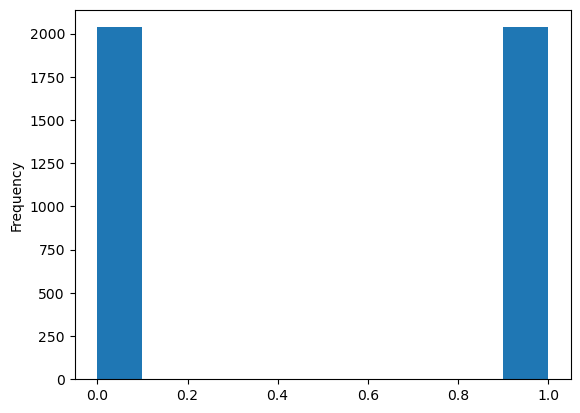

In [26]:
y_rus.plot(kind='hist')

In [27]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64



*   **Random Over sampler**



In [28]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)
X_ros.shape, y_ros.shape, X.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [29]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

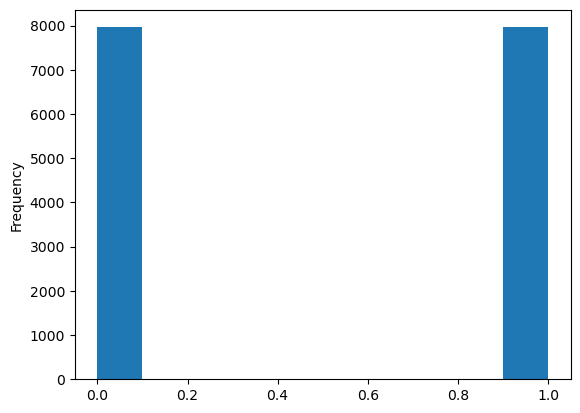

In [30]:
y_ros.plot(kind='hist')

# 10. Splitting Data into Train and Test Sets

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#SPLIT ORIGINAL DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2529)

#SPLIT RANDOM UNDER SAMPLE DATA
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=2529)

#SPLIT RANDOM OVER SAMPLE DATA
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=2529)

# 11. Standardizing Features

In [33]:
from sklearn.preprocessing import StandardScaler

#STANDARDIZE ORIGINAL DATA
sc = StandardScaler()
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

#STANDARDIZE RANDOM UNDER SAMPLE DATA
X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

#STANDARDIZE RANDOM OVER SAMPLE DATA
X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])


# 12. Modeling with SVM

In [34]:
from sklearn.svm import SVC

#MODEL WITH ORIGINAL DATA
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

#MODEL WITH RANDOM UNDER SAMPLE
svc_rus = SVC()
svc_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = svc.predict(X_test_rus)

#MODEL WITH RANDOM OVER SAMPLE
svc_ros = SVC()
svc_ros.fit(X_train_ros, y_train_ros)
y_pred_ros = svc.predict(X_test_ros)


# 13. Model Evaluation

In [35]:
from sklearn.metrics import confusion_matrix, classification_report



*   **MODEL ACCURACY OF ORIGINAL DATASET**



In [36]:
confusion_matrix(y_test, y_pred)

array([[2380,   34],
       [ 410,  176]], dtype=int64)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.84      0.30      0.44       586

    accuracy                           0.85      3000
   macro avg       0.85      0.64      0.68      3000
weighted avg       0.85      0.85      0.82      3000





*  **MODEL ACCURACY OF RANDOM UNDER SAMPLE DATASET**



In [38]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[619,   8],
       [440, 156]], dtype=int64)

In [39]:
print(classification_report(y_test_rus, y_pred_rus))


              precision    recall  f1-score   support

           0       0.58      0.99      0.73       627
           1       0.95      0.26      0.41       596

    accuracy                           0.63      1223
   macro avg       0.77      0.62      0.57      1223
weighted avg       0.76      0.63      0.58      1223





*   **MODEL ACCURACY OF RANDOM OVER SAMPLE DATASET**



In [40]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[2359,   20],
       [1663,  736]], dtype=int64)

In [41]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.59      0.99      0.74      2379
           1       0.97      0.31      0.47      2399

    accuracy                           0.65      4778
   macro avg       0.78      0.65      0.60      4778
weighted avg       0.78      0.65      0.60      4778



# 14. Hyperparameter Tuning


*   **HYPER PARAMETER TUNING OF ORIGNAL DATA**



In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf'],
              'class_weight': ['balanced']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [43]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [44]:
grid_prediction = grid.predict(X_test)
confusion_matrix(y_test, grid_prediction)

array([[2121,  293],
       [ 273,  313]], dtype=int64)

In [45]:
print(classification_report(y_test, grid_prediction))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2414
           1       0.52      0.53      0.53       586

    accuracy                           0.81      3000
   macro avg       0.70      0.71      0.70      3000
weighted avg       0.81      0.81      0.81      3000




*   **HYPER PARAMETER TUNING OF RANDOM UNDER SAMPLE DATA**



In [46]:
param_grid={'C':[0.1,1,10],
            'gamma':[1,0.1,0.01],
            'kernel':['rbf'],
          'class_weight':['balanced']

}

grid_rus = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid_rus.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [47]:
print(grid_rus.best_estimator_)


SVC(C=1, class_weight='balanced', gamma=0.1)


In [48]:
grid_rus_prediction = grid_rus.predict(X_test_rus)
confusion_matrix(y_test_rus, grid_rus_prediction)

array([[490, 137],
       [185, 411]], dtype=int64)

In [49]:
print(classification_report(y_test_rus, grid_rus_prediction))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       627
           1       0.75      0.69      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223





*   **HYPER PARAMETER TUNING OF RANDOM OVER SAMPLE DATA**



In [51]:
grid_ros = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid_ros.fit(X_train_ros, y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.5s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [52]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [53]:
grid_ros_prediction = grid_ros.predict(X_test_ros)
confusion_matrix(y_test_ros, grid_ros_prediction)

array([[2082,  297],
       [ 101, 2298]], dtype=int64)

In [54]:
print(classification_report(y_test_ros, grid_ros_prediction))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2379
           1       0.89      0.96      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



# 15. Comparing Model Accuracies

                       Model  Accuracy
0               Original SVM      0.85
1          Under-sampled SVM      0.63
2           Over-sampled SVM      0.65
3       Tuned SVM (Original)      0.81
4  Tuned SVM (Under-sampled)      0.74
5   Tuned SVM (Over-sampled)      0.92


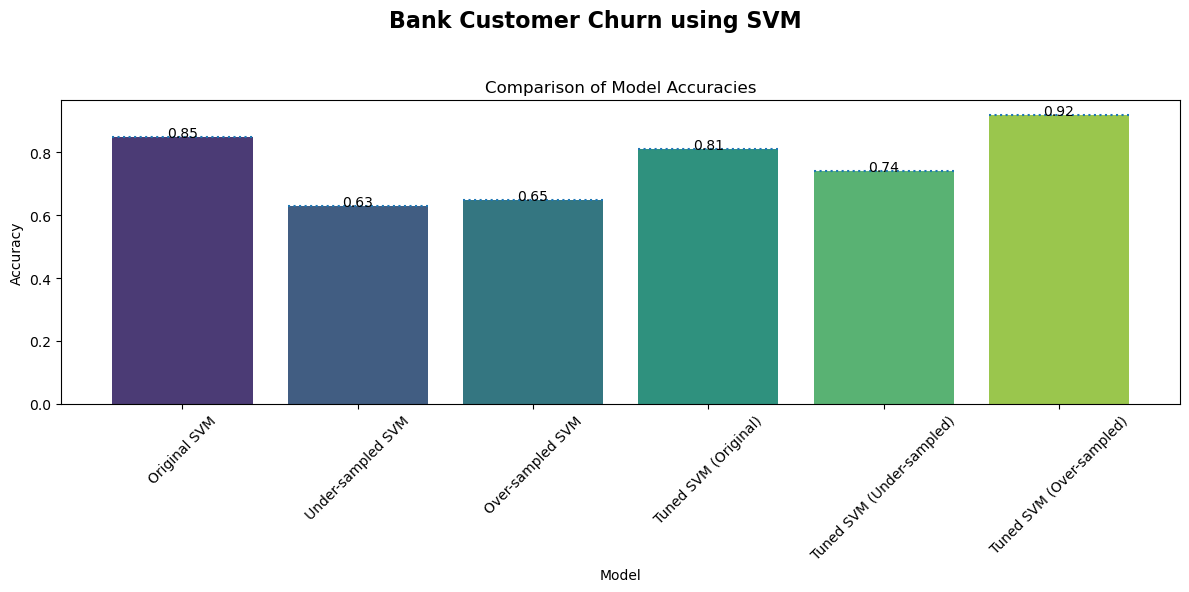

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Calculating accuracies
accuracy_original = accuracy_score(y_test, y_pred)
accuracy_rus = accuracy_score(y_test_rus, y_pred_rus)
accuracy_ros = accuracy_score(y_test_ros, y_pred_ros)
accuracy_tuned = accuracy_score(y_test, grid_prediction)
accuracy_tuned_rus = accuracy_score(y_test_rus, grid_rus_prediction)
accuracy_tuned_ros = accuracy_score(y_test_ros, grid_ros_prediction)

# Creating a DataFrame to compare the accuracies
accuracy_comparison = pd.DataFrame({
    'Model': ['Original SVM', 'Under-sampled SVM', 'Over-sampled SVM', 'Tuned SVM (Original)', 'Tuned SVM (Under-sampled)', 'Tuned SVM (Over-sampled)'],
    'Accuracy': [accuracy_original, accuracy_rus, accuracy_ros, accuracy_tuned, accuracy_tuned_rus, accuracy_tuned_ros]
})

# Rounding the accuracy values to 2 decimal places
accuracy_comparison['Accuracy'] = accuracy_comparison['Accuracy'].round(2)

# Displaying the DataFrame
print(accuracy_comparison)

# Plotting the accuracies for better visualization
plt.figure(figsize=(12, 6))

# Add main title
plt.suptitle('Bank Customer Churn using SVM', fontsize=16, fontweight='bold')

# Add subtitle
plt.title('Comparison of Model Accuracies', fontsize=12)

sns.barplot(x='Model', y='Accuracy', hue='Model', data=accuracy_comparison, palette='viridis', dodge=False, legend=False)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Adding dotted lines to show exact values
for index, row in accuracy_comparison.iterrows():
    plt.text(index, row['Accuracy'], f"{row['Accuracy']:.2f}", color='black', ha="center")
    plt.hlines(y=row['Accuracy'], xmin=index - 0.4, xmax=index + 0.4, linestyles='dotted')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the main title
plt.show()



# The best model is the Tuned SVM with over-sampled data, achieving an accuracy of 0.93. This model performs the best because hyperparameter optimization fine-tunes the model parameters, and over-sampling balances the class distribution, both of which enhance the model's ability to generalize and accurately predict churn.

In [61]:
import pickle

with open("svm_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)
